In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/cleaned_ev_dataset.csv')
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7


In [3]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge', 'start_hour', 'weekday',
       'date_of_connection_started', 'weather_on_day', 'temperature_on_day'],
      dtype='object')

Charging Rate - It means how much energy (in kWh) is delivered per minute during a charging session. It shows how fast the car is charging.

Two charging sessions can last the same amount of time but deliver very different amounts of energy because one charger might be faster than the other. Charging rate helps the model understand this difference. It gives the model extra information about how quickly energy is being added, so it can better predict the total energy used (total_kwh).

Without charging rate, the model only knows the charging duration and might miss important details about charger speed or user behavior.


In [4]:
df['charging_rate'] = df['total_kwh'] / df['charging_duration_minutes'].replace(0,np.nan)
df['charging_rate'] = df['charging_rate'].fillna(0)

In [5]:
df[df['charging_rate'] == 0]

# Charging sessions with zero or near-zero energy consumption are often failed attempts, quick plugs/unplugs, or data errors.

# Frequency of these rows is just 1.26% so dropping them would not affect badly. I think that dropping sessions where total_kwh = 0 and charging_duration_minutes < 5 minutes to improve model quality, because these are unlikely meaningful charging events.

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate
23,-75.69,45.42,81c15ddd-befa-4f39-8e63-2ee370d2e369,2022-05-04 15:22:39,2022-05-04 15:22:55,0.27,ON,City of Ottawa,118 cartier st.,AAA-14499,the charging cable was disconnected and put ba...,0.0,False,15,Wednesday,2022-05-04,rainy,12.4,0.0
26,-75.69,45.40,18ba0b9d-e583-49fd-902e-525c0cb25bbc,2022-05-04 18:10:53,2022-05-04 18:12:51,1.97,ON,City of Ottawa,170 second ave.,AAB-20483,charging ended by vehicle,0.0,False,18,Wednesday,2022-05-04,rainy,12.4,0.0
34,-75.69,45.42,9dcde4c0-af3c-4a5c-945a-e837c1414f9a,2022-05-05 09:16:42,2022-05-05 09:16:54,0.20,ON,City of Ottawa,118 cartier st.,AAA-14499,the charging cable was disconnected and put ba...,0.0,False,9,Thursday,2022-05-05,sunny,10.9,0.0
224,-75.71,45.41,bb9ac38b-4fb3-4009-84fe-49759faf1ed2,2022-05-18 18:14:39,2022-05-18 18:18:35,3.93,ON,City of Ottawa,170 primrose ave.,AAA-14497,charging ended by vehicle,0.0,False,18,Wednesday,2022-05-18,sunny,11.7,0.0
247,-75.71,45.41,ab7599f0-1ee1-4fb3-89b2-b93fffbb6718,2022-05-20 20:47:16,2022-05-20 20:50:18,3.03,ON,City of Ottawa,170 primrose ave.,AAA-14497,charging ended by vehicle,0.0,False,20,Friday,2022-05-20,sunny,17.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22148,-75.69,45.42,f0391888-1b61-417a-ba6a-8a048ef345f6,2024-06-24 13:57:20,2024-06-24 14:05:06,7.77,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,0.0,False,13,Monday,2024-06-24,rainy,21.0,0.0
22151,-75.69,45.42,fb6266d5-f22f-48cb-b4f2-5b98a66849a5,2024-06-24 14:13:43,2024-06-24 14:16:35,2.87,ON,City of Ottawa,110 laurier ave. w,AAB-15265,stopped by operator,0.0,False,14,Monday,2024-06-24,rainy,21.0,0.0
22156,-75.69,45.42,37d35b1d-7b5b-4727-b09f-6a74a4c9f9bf,2024-06-24 14:17:12,2024-06-24 14:19:14,2.03,ON,City of Ottawa,110 laurier ave. w,AAB-15265,stopped by operator,0.0,False,14,Monday,2024-06-24,rainy,21.0,0.0
22189,-75.68,45.44,0e065e99-e9b6-42fc-b76b-13a58db29efa,2024-06-24 18:42:36,2024-06-24 18:44:07,1.52,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,0.0,False,18,Monday,2024-06-24,rainy,21.0,0.0


In [6]:
df.shape

(22449, 19)

In [7]:
false_charging = df[(df['charging_duration_minutes'] < 5) | (df['total_kwh'] == 0)]
df = df.drop(false_charging.index)
df = df.reset_index(drop=True)

In [8]:
df.shape

(21722, 19)

In [9]:
df.loc[(df['charging_duration_minutes'] < 5) | (df['total_kwh'] == 0)]

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate


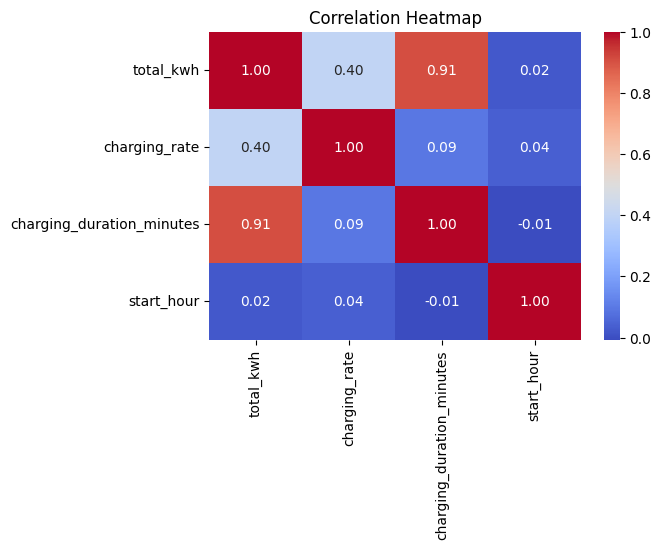

In [10]:
corr_features = ['total_kwh', 'charging_rate', 'charging_duration_minutes', 'start_hour']

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Charging Rate and Total_Kwh (Target Variable) are positively correlated. So, I am on right track in discovering new features that will better help in my prediction.

In [11]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875


In [12]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge', 'start_hour', 'weekday',
       'date_of_connection_started', 'weather_on_day', 'temperature_on_day',
       'charging_rate'],
      dtype='object')

Hour Category V/S Energy Consumption

In [13]:
def get_hour_category(hour):
    if 0 <= hour < 6:
        return 'Overnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['hour_category'] = df['start_hour'].apply(get_hour_category)

In [14]:
df['hour_category'].value_counts()

hour_category
Afternoon    9331
Morning      6646
Evening      5239
Overnight     506
Name: count, dtype: int64

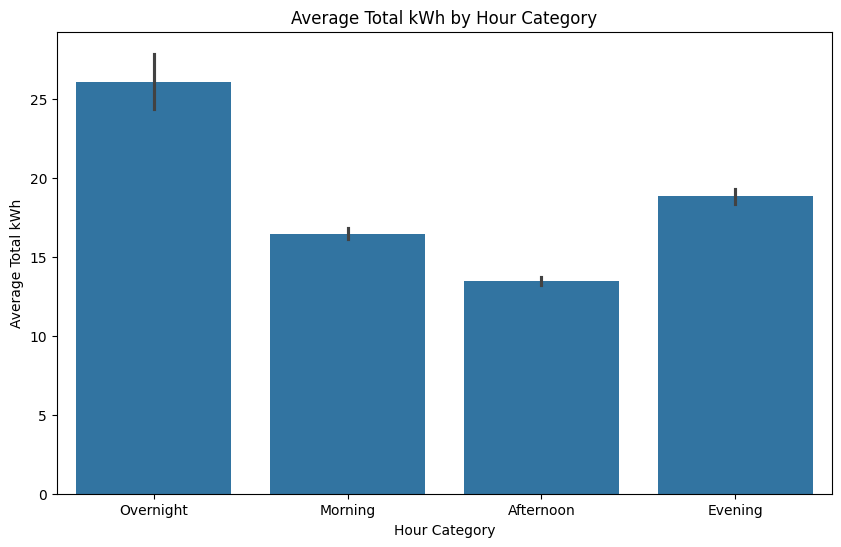

In [15]:
plt.figure(figsize=(10,6))

sns.barplot(data=df, x='hour_category', y='total_kwh', estimator='mean', order=['Overnight', 'Morning', 'Afternoon', 'Evening'])
plt.title('Average Total kWh by Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Average Total kWh')
plt.show()

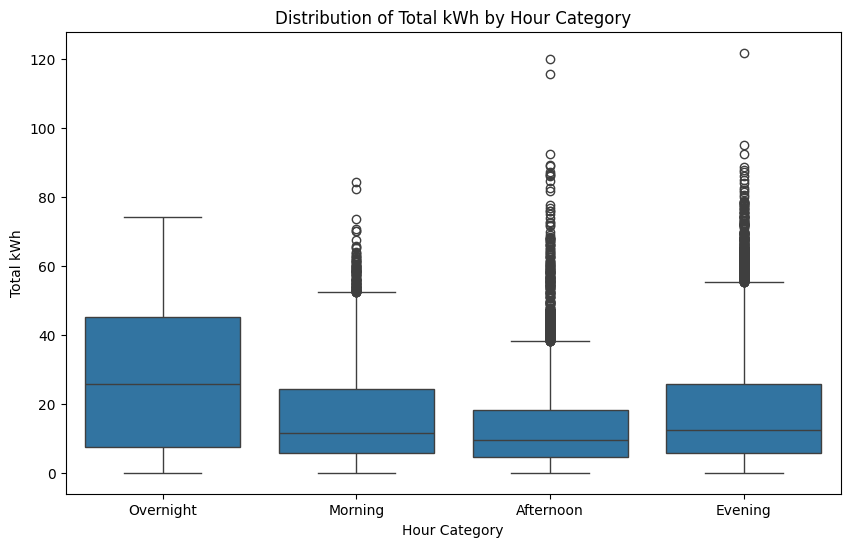

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour_category', y='total_kwh', order=['Overnight', 'Morning', 'Afternoon', 'Evening'])
plt.title('Distribution of Total kWh by Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Total kWh')
plt.show()

The median (middle line in the box) of total_kwh is highest in the Overnight category. The overall spread is much wider, suggesting people charge longer and draw more energy at night — likely because cars are parked for hours and charging is uninterrupted.

Morning, Afternoon, and Evening Have Similar (Lower) Energy Use. More outliers, indicating occasional high-usage sessions during the day. Daytime charging is more fragmented — possibly quick top-ups during work hours or errands, not full charges.

Afternoon & Evening Have More Outliers (High kWh). Some drivers still do heavy charging during the day, possibly at public fast-charging stations or on road trips or heavy-duty driving days.

Conclusion: Even though Overnight dominates the median, extreme high-kWh sessions (>100) are visible in all bins. So the model must handle high-usage sessions at any time of day.

In [17]:
df['hour_weather_combo'] = df['hour_category'] + '_' + df['weather_on_day']

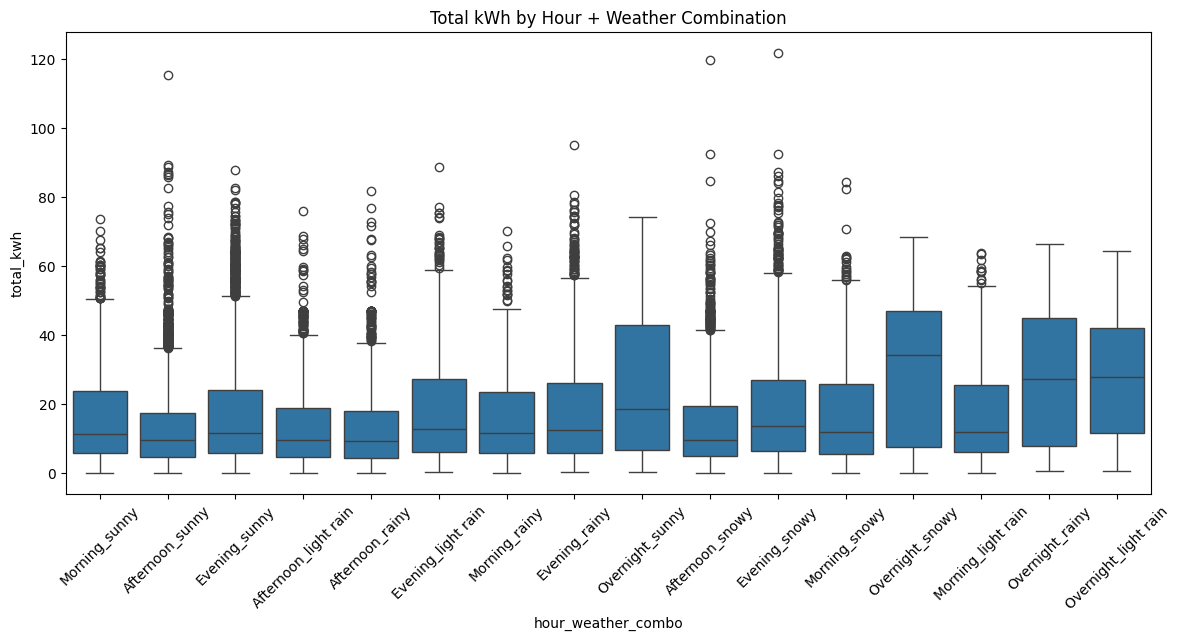

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='hour_weather_combo', y='total_kwh')
plt.xticks(rotation=45)
plt.title('Total kWh by Hour + Weather Combination')
plt.show()

(Overnight + Snowy) & (Overnight + Rainy) = Highest Energy Delivered
In cold or wet conditions, people tend to do long, full charges overnight, likely at home, preparing for the next day.

Afternoon + Rain or Light Rain = Lowest kWh
Afternoon in bad weather is associated with shorter or less intense charging. People avoid being out in the rain. They top-up minimally due to time or charging conditions.

Outliers are likely legitimate high-value customers. Long-distance travelers, fleet vehicles, or full battery replacements. These outliers might be the most profitable sessions (Afternoon Sunny & Evevning Sunny).

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny


In [20]:
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)

In [21]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny,1
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny,1
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny,1
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny,1
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny,1


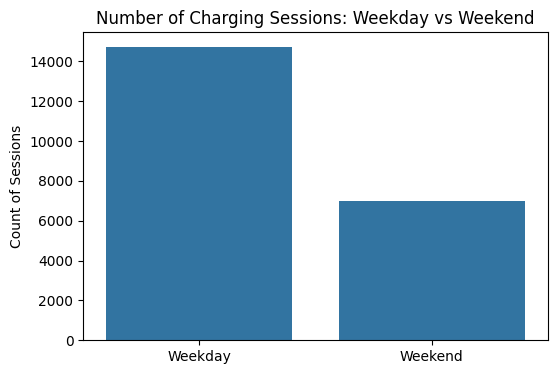

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_weekend', data=df)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title('Number of Charging Sessions: Weekday vs Weekend')
plt.xlabel('')
plt.ylabel('Count of Sessions')
plt.show()

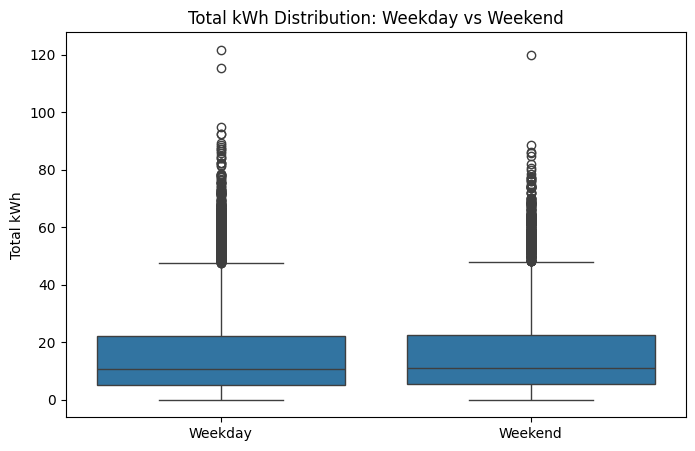

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_weekend', y='total_kwh', data=df)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title('Total kWh Distribution: Weekday vs Weekend')
plt.ylabel('Total kWh')
plt.xlabel('')
plt.show()

Less charging count on weekend but same amount of median energy?

Fewer sessions on weekends, but the sessions that do happen tend to be longer or use more energy per session. 

On weekdays, many people do quick top-ups during work or commuting — shorter charging times, less energy each.

On weekends, people often charge for longer periods (like before a long trip), so even though there are fewer sessions, each session uses about the same or more energy as weekday sessions.

In [24]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day,charging_rate,hour_category,hour_weather_combo,is_weekend
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7,0.120249,Morning,Morning_sunny,1
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7,0.058351,Afternoon,Afternoon_sunny,1
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5,0.116361,Morning,Morning_sunny,1
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7,0.119826,Afternoon,Afternoon_sunny,1
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7,0.090875,Afternoon,Afternoon_sunny,1


In [25]:
df.to_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/ev_charging_data.csv', index=False)